In [1]:
# this part is for creating WattsStrogatz graph
import random
import numpy
from numpy import linspace
import matplotlib.pyplot as plt

def WattsStrogatz(n,k,B):
    #regular matrix
    G = regular(n,k)
    graph = [[0]*len(G) for x in range(len(G))]
    for i in range(len(G)):
        for j in G[i]:
            graph[i][j] = 1
    #rewire       
    for i in range(len(G)):
        for j in range(len(G)):
            if(graph[i][j]==1):
                if(random.random() < B):
                    graph[i][j]=0
                    nr = numpy.random.randint(0,n,dtype='l')
                    # we should not have loop and self-loop and duplicate 
                    while(nr == i and nr ==j):
                        nr = numpy.random.randint(0,n,dtype='l')
                    
                    graph[i][nr] = 1
    return graph
   
def regular(n,k):
    if(k%2==1):
        k=k-1
    adj = [[] for x in range(n)]
    edges=[]
    
    for i in range(k//2 , n-k//2):
        for j in range(1,k//2+1):
            edges.append((i,i+j))
            edges.append((i,i-j))
            
    for i in range(k//2):
        for j in range(1,k//2+1):
            edges.append((i,i+j))
            edges.append((i,(i-j+n)%n))
            
    for i in range(n-k//2,n):
        for j in range(1,k//2+1):
            edges.append((i,(i+j)%n))
            edges.append((i,i-j))
    for (i,j) in edges:
        adj[i].append(j)
    return adj

0
0.4
0.8
1


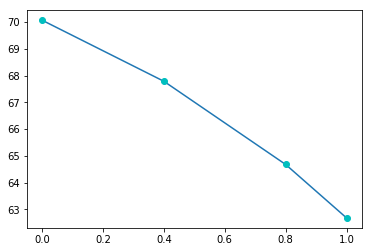

In [9]:
#C
import pylab
def clusteringCo(G):
    sumi = 0
    for i in range(len(G)):
        for j in range(len(G)):
            if(i!=j):
                for k in range(len(G)):
                    if(k!=i and G[j][k]==1):
                        sumi = sumi + 1
    return (sumi)/((len(G)-1)*(len(G)-2))       
x = [0,0.4,0.8,1]
y=[]
for i in x:
    print(i)
    G = WattsStrogatz(1000,70,i)
    y.append(clusteringCo(G))
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
# pylab.plot(x,2*means,x,2*means) 
pylab.show()